In [159]:
import matplotlib.pyplot as plt

In [160]:
"""
figure
"""
fig = plt.figure()  # matplotlib的图像都位于Figure对象中

In [161]:
"""
subplot
"""
# 图像是2x2的，且当前选中的是4个subplot中的第一个(编号从1开始)
ax1 = fig.add_subplot(2, 2, 1)  # 不能通过空Figure绘图，必须使用add_subplot创建一个或者多个subplot才行
ax2 = fig.add_subplot(2, 2, 2)  # add_subplot()返回的对象是AxesSubplot对象, 直接调用它们的实例方法就可以在格子里画图了
ax3 = fig.add_subplot(2, 2, 3)

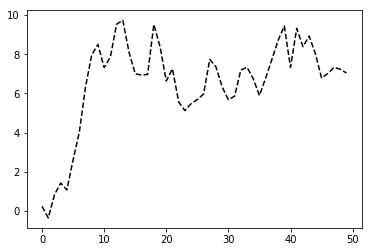

In [36]:
# 绘制黑色虚线图
from numpy.random import randn
# plot函数接受一组x,y坐标, 还可以接受一个表示颜色和线型的字符串缩写
plt.plot(randn(50).cumsum(), 'k--')  # 'k--'是一个虚线选项
plt.show()

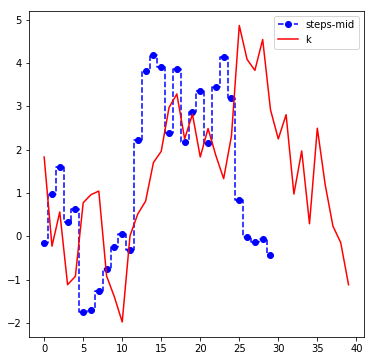

(0.0, 1.0)

In [125]:
# plt.plot(x, y, 'g--')  # 根据x,y 绘制绿色虚线
# 推荐下面的写法, 等同于上面
# plt.plot(x, y, linestyle='--', color='g')

data1 = randn(30).cumsum()  # 传入的第一个参数为x轴最大值，如果再传一个则为y的最大值
data2 = randn(40).cumsum()
# 使用set_xticks和set_xticklabels，来要修改x轴的刻度
'''
set_xticks()要告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下就是刻度标签
set_xticklabels()可以将任何其他的值作为标签
'''
# ticks = ax1.set_xticks([0, 10, 20, 30, 40])
# labels = ax1.set_xticklabels(
#     ['one', 'two', 'three', 'four', 'five'],
#     rotation=30, fontsize='small'
# )
# ax.set_xlabel('stages')  # 给x轴设置名称，y轴的修改方式类似, 只要把代码中x换成y就可以了
# ax.set_title('my plot')  # 设置标题
plt.plot(data1, 'ko--', drawstyle='steps-mid', label='steps-mid', color='blue')
plt.plot(data2, 'k', color='red', label='k')

plt.legend(loc='best')  # 带有标记的线型图
plt.show()
plt.xlim()  # 返回当前x轴的绘制范围
# plt.xlim([0, 10])  # 将x轴的范围设置为0到10

In [26]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [28]:
fig, axes = plt.subplots(2, 3)
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1064a9c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x106806c88>]], dtype=object)

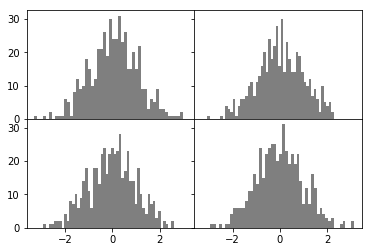

In [35]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
# wspace和space用于控制宽度和高度的百分比
# 利用Figure的subplots_adjust()可以轻而易举的修改间距
# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

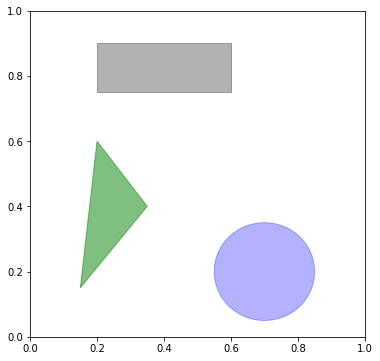

In [127]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 将图表保存到文件
# plt.savefig('tmp,_figpath.png')
plt.savefig('tmp_figpath.png', dpi=400, bbox_inches='tight')  # dpi：分辨率, 默认100, bbox_inches：图表要保存的部分, 此处为tight, 则裁剪当前图标周围的空白部分

# savefig并非一定要写入磁盘，也可以写入到任何文件对象，比如StringIO
'''
from io import StringIO
buffer = StringIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
'''
# plt.rc('figure', figsize=(6, 6))  #  利用rc() 操作matplotlib配置系统
plt.show()

In [158]:
"""
柱状图
"""
from pandas import Series
fig, axes = plt.subplots(2, 1)
data = Series(
    np.random.rand(16),
    index=list('abcdefghijkmnop')
)
data.plot(kind='bar', ax=axes[0], color('k'), alpha=0.7)

SyntaxError: positional argument follows keyword argument (<ipython-input-158-f13ebfaed841>, line 10)

In [152]:
from pandas import DataFrame
# import pandas as pd
df = DataFrame(
    np.random.rand(6, 4),
    index = ['one', 'two', 'three', 'four', 'five', 'six'],
    columns = pd.Index(['A', 'B', 'C', 'D'],name = 'Genus')
)
df

Genus         A         B         C         D
one    0.894752  0.216648  0.313473  0.044428
two    0.994125  0.981953  0.586638  0.717942
three  0.119360  0.725879  0.637966  0.095844
four   0.791613  0.015699  0.579710  0.787404
five   0.838961  0.407313  0.848452  0.474727
six    0.559344  0.684946  0.665741  0.408321

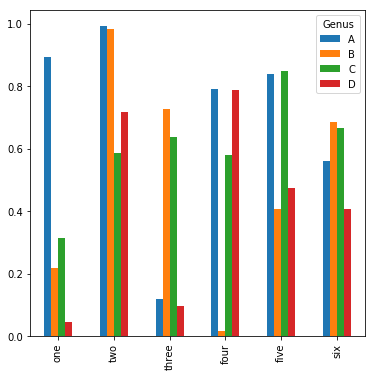

In [163]:
df.plot(kind='bar')
plt.show()

In [167]:
tips = pd.read_csv('./tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts

col_0  1708
day        
Fri      19
Sat      87
Sun      76
Thur     62

In [170]:
"""
DataFrame堆积柱状图
"""
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

col_0  1708
day        
Fri     1.0
Sat     1.0
Sun     1.0
Thur    1.0

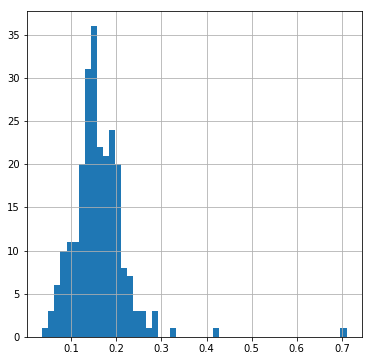

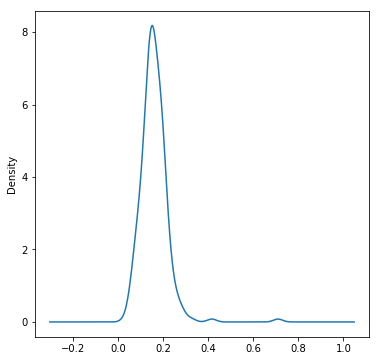

In [173]:
"""
小费百分比直方图
"""
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)
plt.show()

"""
小费百分比密度图
"""
tips['tip_pct'].plot(kind='kde')
plt.show()

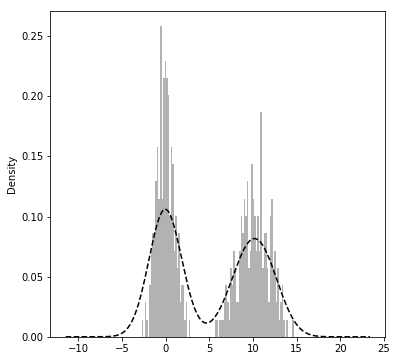

In [175]:
"""
带有密度估计的格式化直方图
由两个不同的标准正态分布组成的双峰分布
"""
from pandas import Series
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)

values = Series(np.concatenate([comp1, comp2]))

values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')
plt.show()

In [176]:
"""
散布图：是观察两个一维数据序列之间的关系的有效手段
"""
macro = pd.read_csv('./macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

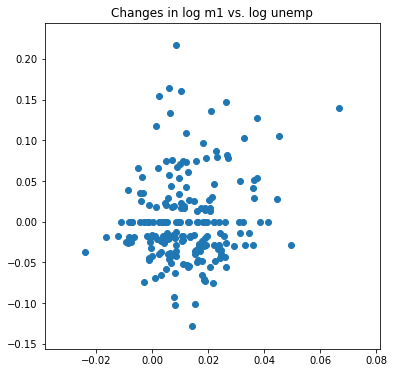

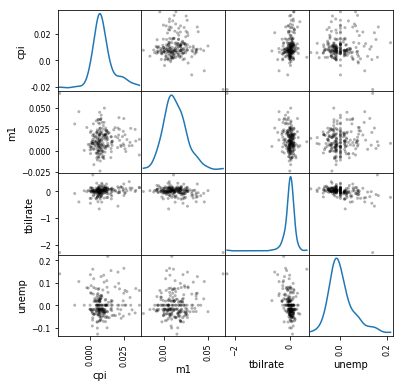

In [181]:
"""
利用plt.scatter即可轻松绘制一张简单的散布图
"""
plt.scatter(trans_data['m1'], trans_data['unemp'])

plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

# 散布图矩阵
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
plt.show()

In [182]:
"""
绘制地图：图形化显示海地地震危机数据
"""
data = pd.read_csv('./Haiti.csv')
data

Serial                                     INCIDENT TITLE  \
0       4052  * URGENT * Type O blood donations needed in #J...   
1       4051                     Food-Aid sent to Fondwa, Haiti   
2       4050  how haiti is right now and how it was during t...   
3       4049                                        Lost person   
4       4042                                 Citi Soleil school   
5       4041                           Radio Commerce in Sarthe   
6       4040                   Contaminated water in Baraderes.   
7       4039     Violence at &quot;arcahaie bas Saint-Ard&quot;   
8       4038                          No electricity in pernier   
9       4037  Shelter and food needed at Lamentin 54 and Rue...   
10      4036  Food needed, House collapsed in 1ere Section S...   
11      4035                      Clogged toilet in canape vert   
12      4034  Tent shelter and food needed on Lapot St. Carr...   
13      4033                           Help needed in Brochette   
14      4031  Victims of Sexual Assault in Champs-de-Mars Sh...   
15      4030               Help needed in 1ere section, Leogane   
16      4029   Food /water  and  medicals supplies/ petit-goave   
17      4027              Medical attention needed on Delmas 41   
18      4025      Water needed for woman and child on Delmas 72   
19      4024                 needed help on anything/ Aral road   
20      4021              school materials needed in Mirebalais   
21      4020              Shelters needed for school in Dikini.   
22      4019                         Shelter needed in Leogane.   
23      4018                                   Eliante Valentin   
24      4010                            Starvation in La Gonave   
25      4009           children  need help, in Corail, Jeremie.   
26      4008               Water desperately needed in Delmas 3   
27      4007                             Tent needed in Santo 6   
28      4006                        Electricity needed in Marin   
29      4005                            Help needed on Delmas 9   
...      ...                                                ...   
3563      33    Buses between Les Cayes and PAP getting through   
3564      32                              Looking for UN Member   
3565      31                       The tax office has collapsed   
3566      30                           Parliament has collapsed   
3567      29  Found - James Colin, Alourdes Thomas Colin, Xa...   
3568      28                       Looking for the Dorce Family   
3569      27                                Trapped in building   
3570      26     More photos and videos of earthquake aftermath   
3571      25                            Post-earthquake footage   
3572      24                                Earth quake SERIAL!   
3573      23            The National Palace, Before &amp; After   
3574      22      Over 100 UN personnel trapped in collapsed HQ   
3575      21                                      Ruined school   
3576      20                                        PAP Airport   
3577      19                            Hospital du Canape Vert   
3578      18                                   Hospital Frances   
3579      17                    Hospital Universitario De Haiti   
3580      16        Magnitude 7.0, 2010 January 12 21:53:09 UTC   
3581      15                             Karibe Hotel Collapsed   
3582      14          MSF Teams Set up Clinics to Treat Injured   
3583      13            Prisoners escaped from collapsed prison   
3584      12                            Hotel Montana Collapsed   
3585      11               Haiti: Earthquake - Jan 2010 / SiRep   
3586      10                            Photos haiti earthquake   
3587       9     Your Haiti earthquake photos - Washington Post   
3588       8                         Canape Vert road destroyed   
3589       7               Collapsed Building -- People Trapped   
3590       6             Eye-Witness Report from Hote

In [183]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

INCIDENT DATE   LATITUDE   LONGITUDE
0  05/07/2010 17:26  18.233333  -72.533333
1  28/06/2010 23:06  50.226029    5.729886
2  24/06/2010 16:21  22.278381  114.174287
3  20/06/2010 21:59  44.407062    8.933989
4  18/05/2010 16:26  18.571084  -72.334671
5  26/04/2010 13:14  18.593707  -72.310079
6  26/04/2010 14:19  18.482800  -73.638800
7  26/04/2010 14:27  18.415000  -73.195000
8  15/03/2010 10:58  18.517443  -72.236841
9  15/03/2010 11:00  18.547790  -72.410010

In [184]:
# CATEGORY字段含有一组以逗号分隔的代码，这些代码表示消息类型：
data['CATEGORY'][:6]
# 自习观察下面这个数据摘要，就能发现有些分类信息缺失，因此我需要丢弃这些数据点

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [185]:
# 此外调用describe还能发现数据中存在一些异常的地理位置
data.describe()

Serial     LATITUDE    LONGITUDE
count  3593.000000  3593.000000  3593.000000
mean   2080.277484    18.611495   -72.322680
std    1171.100360     0.738572     3.650776
min       4.000000    18.041313   -74.452757
25%    1074.000000    18.524070   -72.417500
50%    2163.000000    18.539269   -72.335000
75%    3088.000000    18.561820   -72.293570
max    4052.000000    50.226029   114.174287

In [ ]:
# 清除错误位置信息并移除缺失分类信息是一件简单的事
data = data[
    (data.LATITUDE > 18) & (data.LATITUDE > 20) &
    (data.LONGITUDE > -75) & (data.LONGITUDE > -70)
    & data.CATEGORY.notnull()
]

In [188]:
# 用于获取所有分类的列表
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

# 用于将各个分类信息拆分为编码和英语名称
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

# 测试：
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [192]:
# 接下来，我做了一个将编码和名称映射起来的字典，这是因为等会我们要用编码进行分析
all_cats = get_all_categories(data.CATEGORY)

# 生成器表达式
english_mapping = dict(get_english(x) for x in all_cats)
# english_mapping['2a']
english_mapping['6c']

AttributeError: 'float' object has no attribute 'split'